In [14]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

In [15]:
df = pd.read_csv("data_cleaned.csv",sep=",")

In [16]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [26]:
df=pd.get_dummies(df, drop_first=True, dtype=float)


I am using the pd.get_dummies() function to create dummy variables for categorical columns in the DataFrame (df). The drop_first=True parameter is used to avoid multicollinearity by dropping the first category of each categorical variable. Setting dtype=float ensures that the dummy variables are of type float.

In [42]:
y = df['like']   
X = df.drop('like', axis=1) 


Like is the chosen target variable. This is so because this is what we want to predict. We want to predict how many likes a post will get based on likes, shares, post hour, post weekday and so forth.

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We’ve split our data and we’ve scaled our data so now all that’s left is to fit and predict!


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


I was getting an error while trying to perform linear regression. It is saying "ValueError: could not convert string to float: 'Photo.' So I Identifed the column that contained non-numeric values.

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

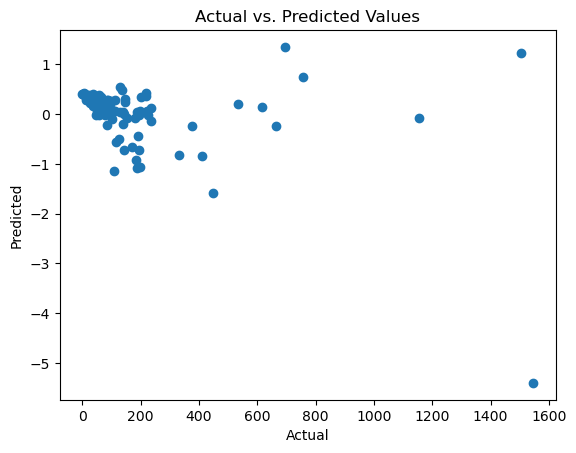

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [50]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

                                              Feature   Coefficient
0                                    Page total likes  7.243260e-14
1                                            Category  8.171241e-14
2                                          Post Month  9.353241e-14
3                                        Post Weekday -8.572770e-14
4                                           Post Hour -4.572548e-14
5                                                Paid  3.747471e-14
6                           Lifetime Post Total Reach -2.695198e-14
7                     Lifetime Post Total Impressions  1.631643e-13
8                              Lifetime Engaged Users  4.548252e-13
9                             Lifetime Post Consumers -8.436812e-13
10                         Lifetime Post Consumptions -4.047590e-14
11  Lifetime Post Impressions by people who have l... -1.406478e-13
12   Lifetime Post reach by people who like your Page  5.953230e-14
13  Lifetime People who have liked your Page and

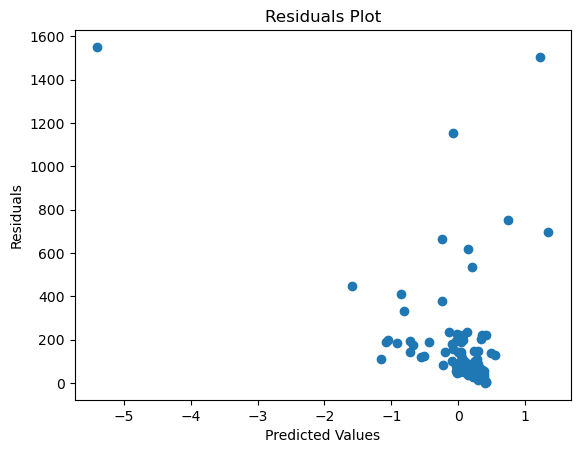

In [51]:
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

The Residuals are the actual differences between the predicted value and the actual. Usually we want this to be random because it means there’s no underlying trend we’re missing but ours is not scattered and random. These show underlying issues with the model which might showcase things we missed. This one is pretty clear as it is due to outliers. Usually we can delete outliers if they are anomalies but I chose to keep the outliers because it is normal to have posts with higher engagements than posts on a page. A preganacy annoucement post, graduation picture posts and or even stunning pictures that are eye catching could get higher engagements on a post.